In [95]:
import numpy as np
import pandas as pd
import seaborn as sns

### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).


In [96]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
df = pd.read_csv("housing.csv")

--2023-09-25 17:50:44--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.5’

housing.csv.5       100%[===================>]   1.36M  --.-KB/s    in 0.01s   

2023-09-25 17:50:44 (91.6 MB/s) - ‘housing.csv.5’ saved [1423529/1423529]



### EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 


In [97]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: >

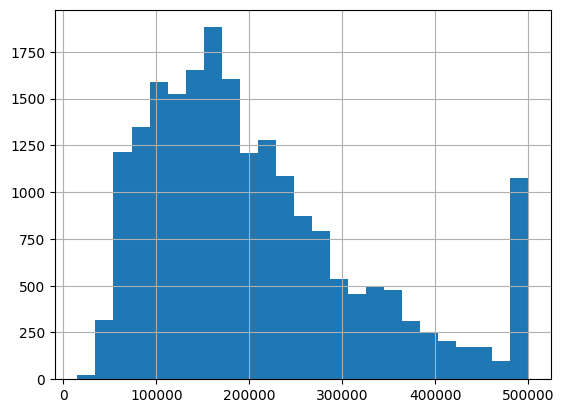

In [98]:
df['median_house_value'].hist(bins=25)

### Preparing the dataset 

For this homework, we only want to use a subset of data. 

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Next, use only the following columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`


In [99]:
df_sub = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])].drop(columns='ocean_proximity')
df_sub

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


### Question 1

There's one feature with missing values. What is it?

* `total_rooms`
* `total_bedrooms` ✅
* `population`
* `households`

In [100]:
df_sub.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable `'population'`?

- 995
- 1095
- 1195 ✅
- 1295


In [101]:
df_sub.population.median()

1195.0

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.


In [102]:
df_sub_random = df_sub.sample(frac=1.0, random_state=42)

In [103]:
y_sub_random = np.log1p(df_sub_random['median_house_value'])
X_sub_random = df_sub_random.drop(columns='median_house_value')


In [104]:
n = len(X_sub_random)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_val - n_test

n, n_val + n_train + n_test

(15687, 15687)

In [105]:
X_train = X_sub_random[:n_train]
y_train = y_sub_random[:n_train]

X_val_sub_ran = X_sub_random[n_train:n_train + n_val]
y_val = y_sub_random[n_train:n_train + n_val]

X_test_sub_ran = X_sub_random[n_train + n_val:]
y_test = y_sub_random[n_train + n_val:]

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good ✅

In [106]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [107]:
def rmse(y, y_pred, decimals=2):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.round(np.sqrt(mse), decimals)

##### Option 1. Fill with zeros

In [108]:
w0_zero, w_zero = train_linear_regression(X_train.fillna(0), y_train)
w0_zero, w_zero

(-9.76324947708778,
 array([-2.55938802e-01, -2.68233309e-01,  1.77710730e-03, -3.38393956e-05,
         2.93766352e-04, -1.52190447e-04,  3.96908643e-04,  1.80600946e-01]))

In [109]:
y_pred_zero = w0_zero + X_train.dot(w_zero)
y_pred_zero 

19963    11.489020
5929     12.148569
11377    12.458527
6443     11.959919
17546    11.893473
           ...    
20157    12.539067
20005    11.442513
6691     12.913324
3470     11.930767
5498     12.116143
Length: 9413, dtype: float64

In [110]:
rmse(y_train, y_pred_zero)

0.34

##### Option 2. Fill with mean

In [111]:
w0_mean, w_mean = train_linear_regression(X_train.fillna(X_train.total_bedrooms.mean()), y_train)
w0_mean, w_mean

(-9.886133215653144,
 array([-2.57026361e-01, -2.68652914e-01,  1.79880767e-03, -3.87631029e-05,
         3.78806885e-04, -1.49641599e-04,  3.25344392e-04,  1.81951358e-01]))

In [112]:
y_pred_mean = w0_mean + X_train.dot(w_mean)
y_pred_mean 

19963    11.481485
5929     12.142045
11377    12.451484
6443     11.959550
17546    11.894252
           ...    
20157    12.540202
20005    11.439026
6691     12.913943
3470     11.934661
5498     12.112811
Length: 9413, dtype: float64

In [113]:
rmse(y_train, y_pred_mean)

0.34

<Axes: ylabel='Count'>

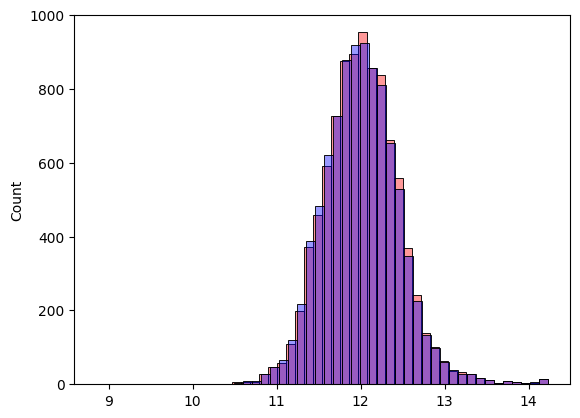

In [114]:
sns.histplot(y_pred_zero, color='red', alpha=0.4, bins=50)
sns.histplot(y_pred_mean, color='blue', alpha=0.4, bins=50)

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0 ✅
- 0.000001
- 0.001
- 0.0001

In [115]:
def train_linear_regression_reg(X, y, reg=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX = XTX + reg * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [116]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0_zero_reg, w_zero_reg = train_linear_regression_reg(X_train.fillna(0), y_train, reg=r)
    y_pred_reg_val = w0_zero_reg + X_val_sub_ran.dot(w_zero_reg)
    rsme_val_reg = rmse(y_val, y_pred_reg_val)
    print("For a reg of {} the rsme score el validation is {}".format(r, rsme_val_reg))

    

For a reg of 0 the rsme score el validation is 0.34
For a reg of 1e-06 the rsme score el validation is 0.34
For a reg of 0.0001 the rsme score el validation is 0.34
For a reg of 0.001 the rsme score el validation is 0.34
For a reg of 0.01 the rsme score el validation is 0.34
For a reg of 0.1 the rsme score el validation is 0.34
For a reg of 1 the rsme score el validation is 0.34
For a reg of 5 the rsme score el validation is 0.35
For a reg of 10 the rsme score el validation is 0.35


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)




What's the value of std?

- 0.5
- 0.05
- 0.005 ✅
- 0.0005

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [117]:
rmses = []
for seed in range(10):
    df_sub_random = df_sub.sample(frac=1.0, random_state=seed)

    y_sub_random = np.log1p(df_sub_random['median_house_value'])
    X_sub_random = df_sub_random.drop(columns='median_house_value')

    X_train = X_sub_random[:n_train]
    y_train = y_sub_random[:n_train]

    X_val_sub_ran = X_sub_random[n_train:n_train + n_val]
    y_val = y_sub_random[n_train:n_train + n_val]

    X_test_sub_ran = X_sub_random[n_train + n_val:]
    y_test = y_sub_random[n_train + n_val:]


    w0_zero, w_zero = train_linear_regression(X_train.fillna(0), y_train)
    y_pred_val = w0_zero + X_val_sub_ran.dot(w_zero)
    rmses.append(rmse(y_val, y_pred_val, decimals=10))

print("The standard deviation of RMSEs is {}".format(round(np.std(rmses), 3)))
    
    

The standard deviation of RMSEs is 0.005


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?


Options:

- 0.13
- 0.23
- 0.33 ✅
- 0.43

In [118]:

df_sub_random = df_sub.sample(frac=1.0, random_state=9)

y_sub_random = np.log1p(df_sub_random['median_house_value'])
X_sub_random = df_sub_random.drop(columns='median_house_value')

# combine the train + val
X_train = X_sub_random[:n_train + n_val]
y_train = y_sub_random[:n_train + n_val]

X_test_sub_ran = X_sub_random[n_train + n_val:]
y_test = y_sub_random[n_train + n_val:]


w0_zero, w_zero = train_linear_regression_reg(X_train.fillna(0), y_train, reg=0.001)
y_pred_test = w0_zero + X_test_sub_ran.dot(w_zero)

print("The RMSE on test dataset is {}".format(rmse(y_test, y_pred_test, decimals=2)))
    
    

The RMSE on test dataset is 0.33
